In [1]:
import os
# Changes the current working directory so to mimic running from projects root, i.e (./yolo_v1_taco).
# os.getcwd().rsplit("/", 1)[0]
os.chdir(os.getcwd().rsplit("/", 1)[0])
print(os.getcwd())

/Users/tonyavis/Main/AI_public_projects/object_detection/yolo_v1_taco


In [ ]:
# ./showcase_images/000027_JPG_jpg.rf.14b944888cb86333dfde8b726115c2be.jpg

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_relative_bbox(image_path, bbox):
    """
    Plots a relative bbox on the image.
    
    Parameters:
    - image_path (str): Path to the image.
    - bbox (tuple): (x_center, y_center, width, height) all relative to image size (0-1 range).
    """
    # Load image
    image = Image.open(image_path)
    width, height = image.size
    
    # Convert bbox to pixel coordinates
    x_center, y_center, w_rel, h_rel = bbox
    box_width = w_rel * width
    box_height = h_rel * height
    x_min = (x_center * width) - (box_width / 2)
    y_min = (y_center * height) - (box_height / 2)

    # Plot
    fig, ax = plt.subplots()
    ax.imshow(image)
    rect = patches.Rectangle((x_min, y_min), box_width, box_height,
                             linewidth=2, edgecolor='blue', facecolor='none')
    ax.add_patch(rect)
    plt.axis('off')
    plt.show()

In [6]:
bbox = (
    0.6274038461538461,
    0.8028846153846154,
    0.16346153846153846,
    0.13341346153846154,
)

In [ ]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
import numpy as np

def plot_relative_bbox(image_path, bbox):
    """
    Plots a relative bbox and clear visual guides with a dimmed image.
    
    Parameters:
    - image_path (str): Path to the image.
    - bbox (tuple): (x_center, y_center, width, height) in relative coords.
    """
    # Load and dim image
    image = Image.open(image_path).convert("RGB")
    enhancer = ImageEnhance.Brightness(image)
    image_dimmed = enhancer.enhance(0.4)  # darker image
    image_np = np.array(image_dimmed)

    # Image dimensions
    width, height = image.size

    # Unpack and convert relative to pixel
    x_c_rel, y_c_rel, w_rel, h_rel = bbox
    x_c = x_c_rel * width
    y_c = y_c_rel * height
    box_w = w_rel * width
    box_h = h_rel * height
    x_min = x_c - box_w / 2
    y_min = y_c - box_h / 2

    # Plot
    fig, ax = plt.subplots()
    ax.imshow(image_np)

    # Draw blue bbox
    rect = patches.Rectangle((x_min, y_min), box_w, box_h, linewidth=2,
                             edgecolor='blue', facecolor='none')
    ax.add_patch(rect)

    # Draw red center point
    ax.plot(x_c, y_c, 'ro', markersize=6)

    # Helper to add clear text
    def add_label(x, y, text, color, rotation=0, ha='left', va='top'):
        t = ax.text(x, y, text, color=color, fontsize=10, weight='bold',
                    rotation=rotation, ha=ha, va=va)
        t.set_path_effects([
            path_effects.Stroke(linewidth=2.5, foreground='black'),
            path_effects.Normal()
        ])

    # Add center coordinates label
    add_label(x_c - 50, y_c - 10, f"Center\n({x_c_rel:.2f}, {y_c_rel:.2f})", 'red')

    # Width arrow (yellow)
    ax.annotate("", xy=(x_c - box_w / 2, y_c + box_h / 2 + 15),
                xytext=(x_c + box_w / 2, y_c + box_h / 2 + 15),
                arrowprops=dict(arrowstyle='<->', color='yellow', lw=2))
    add_label(x_c, y_c + box_h / 2 + 20, f"Width: {w_rel:.2f}", 'yellow', ha='center')

    # Height arrow (lime green)
    ax.annotate("", xy=(x_c + box_w / 2 + 15, y_c - box_h / 2),
                xytext=(x_c + box_w / 2 + 15, y_c + box_h / 2),
                arrowprops=dict(arrowstyle='<->', color='lime', lw=2))
    add_label(x_c + box_w / 2 + 20, y_c, f"Height: {h_rel:.2f}", 'lime', rotation=90, va='center')

    # Hide axes
    # plt.axis('off')
    plt.tight_layout()
    plt.show()

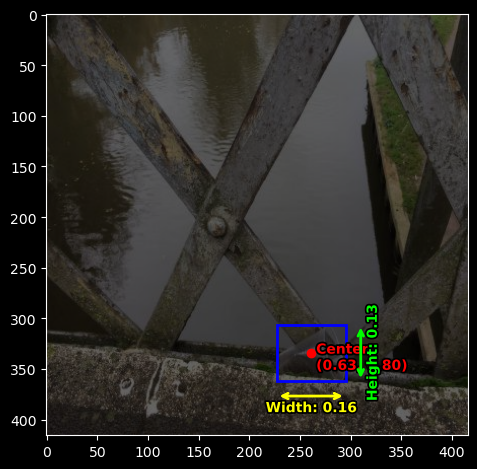

In [26]:
plot_relative_bbox("./showcase_images/000027_JPG_jpg.rf.14b944888cb86333dfde8b726115c2be.jpg", bbox)